# 🔒 Análisis Exploratorio de Datos - Brute Force Detection

## Dataset: CSE-CIC-IDS2018 (Consolidado y Balanceado)

### Objetivo:
Realizar un análisis exploratorio completo del dataset de ataques de Brute Force para:
1. Comprender la distribución de clases
2. Identificar features clave que distinguen ataques de tráfico normal
3. Detectar patrones en los ataques de Brute Force
4. Preparar insights para el modelado

### Dataset:
- **Archivo**: `../processed_data/brute_force_balanced.csv`
- **Registros**: ~763,000
- **Features**: 60
- **Balance**: 50% Brute Force / 50% Benign
- **Tipos de Brute Force**: FTP, SSH, Web, XSS (consolidados)

---

In [1]:
# PASO 1: CONFIGURACIÓN INICIAL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Configuración de visualización
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Configuración de figuras
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ NumPy version: {np.__version__}")

✓ Librerías importadas correctamente
✓ Pandas version: 2.1.4
✓ NumPy version: 1.26.3


---

In [2]:
# PASO 2: CARGA DEL DATASET BALANCEADO

print("Cargando dataset...")
df = pd.read_csv('../processed_data/brute_force_balanced.csv')

print(f"\n{'='*80}")
print("DATASET CARGADO EXITOSAMENTE")
print(f"{'='*80}")
print(f"Registros: {len(df):,}")
print(f"Features: {df.shape[1] - 1} (sin contar Label)")
print(f"Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Cargando dataset...

DATASET CARGADO EXITOSAMENTE
Registros: 763,568
Features: 60 (sin contar Label)
Tamaño en memoria: 391.41 MB


In [3]:
# EXPLORACIÓN INICIAL DEL DATASET

print(f"\n{'='*80}")
print("INFORMACIÓN GENERAL DEL DATASET")
print(f"{'='*80}")

print(f"\nShape: {df.shape}")
print(f"\nColumnas ({len(df.columns)}):")
print(df.columns.tolist())

print(f"\nTipos de datos:")
print(df.dtypes.value_counts())

print(f"\nPrimeras 5 filas:")
df.head()


INFORMACIÓN GENERAL DEL DATASET

Shape: (763568, 61)

Columnas (61):
['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Ac

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Fwd IAT Std,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,Down/Up Ratio,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Label
0,0.7967,0.3529,0.9500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0385,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0192,0.0385,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0119,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2372,0.9695,0.0000,0.4167,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Benign
1,0.0008,1.0000,0.9989,0.0000,0.0000,0.0000,0.0000,0.0007,0.0295,0.0038,0.0000,0.0177,0.0486,0.0385,0.0000,0.0001,0.0004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0004,0.0295,0.0011,0.0208,0.0018,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0119,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Benign
2,0.0068,0.3529,0.8553,0.0020,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0007,0.0015,0.0019,0.0019,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1250,0.1250,0.0000,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Benign
3,0.0008,1.0000,0.9983,0.0004,0.0000,0.0000,0.0000,0.0006,0.0274,0.0036,0.0000,0.0247,0.0678,0.0537,0.0000,0.0000,0.0000,0.0001,0.0002,0.0002,0.0000,0.0002,0.0002,0.0000,0.0002,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0274,0.0015,0.0252,0.0037,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0119,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.1667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Benign
4,0.0003,0.3529,0.0432,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0119,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4102,0.0000,0.0000,0.8333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Brute Force


In [4]:
# INFORMACIÓN DETALLADA

print(f"\n{'='*80}")
print("INFO DEL DATASET")
print(f"{'='*80}")
df.info()


INFO DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763568 entries, 0 to 763567
Data columns (total 61 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           763568 non-null  float64
 1   Protocol           763568 non-null  float64
 2   Timestamp          763568 non-null  float64
 3   Flow Duration      763568 non-null  float64
 4   Tot Fwd Pkts       763568 non-null  float64
 5   Tot Bwd Pkts       763568 non-null  float64
 6   TotLen Fwd Pkts    763568 non-null  float64
 7   Fwd Pkt Len Max    763568 non-null  float64
 8   Fwd Pkt Len Min    763568 non-null  float64
 9   Fwd Pkt Len Mean   763568 non-null  float64
 10  Fwd Pkt Len Std    763568 non-null  float64
 11  Bwd Pkt Len Max    763568 non-null  float64
 12  Bwd Pkt Len Min    763568 non-null  float64
 13  Bwd Pkt Len Mean   763568 non-null  float64
 14  Bwd Pkt Len Std    763568 non-null  float64
 15  Flow Byts/s        763568 non-nul

In [5]:
# ESTADÍSTICAS DESCRIPTIVAS

print(f"\n{'='*80}")
print("ESTADÍSTICAS DESCRIPTIVAS")
print(f"{'='*80}")

df.describe().T


ESTADÍSTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max
Dst Port,763568.0000,0.0657,0.2039,0.0000,0.0003,0.0003,0.0068,1.0000
Protocol,763568.0000,0.4451,0.2321,0.0000,0.3529,0.3529,0.3529,1.0000
Timestamp,763568.0000,0.3689,0.4365,0.0000,0.0106,0.0463,0.8848,1.0000
Flow Duration,763568.0000,0.0729,0.2209,0.0000,0.0000,0.0000,0.0032,1.0000
Tot Fwd Pkts,763568.0000,0.0001,0.0009,0.0000,0.0000,0.0000,0.0001,0.2157
Tot Bwd Pkts,763568.0000,0.0001,0.0012,0.0000,0.0000,0.0000,0.0000,0.2196
TotLen Fwd Pkts,763568.0000,0.0001,0.0011,0.0000,0.0000,0.0000,0.0001,0.9911
Fwd Pkt Len Max,763568.0000,0.0026,0.0043,0.0000,0.0000,0.0000,0.0030,0.5778
Fwd Pkt Len Min,763568.0000,0.0044,0.0145,0.0000,0.0000,0.0000,0.0000,0.9781
Fwd Pkt Len Mean,763568.0000,0.0030,0.0045,0.0000,0.0000,0.0000,0.0050,0.7786


---

## 📊 Análisis de Calidad de Datos

In [6]:
# ANÁLISIS DE CALIDAD DE DATOS

print(f"\n{'='*80}")
print("ANÁLISIS DE CALIDAD DE DATOS")
print(f"{'='*80}")

# Valores nulos
print(f"\nValores nulos por columna:")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("✓ No hay valores nulos en el dataset")
else:
    print(null_counts[null_counts > 0])

# Valores duplicados
duplicates = df.duplicated().sum()
print(f"\nRegistros duplicados: {duplicates:,}")
if duplicates == 0:
    print("✓ No hay registros duplicados")

# Valores únicos en Label
print(f"\nValores únicos en 'Label':")
print(df['Label'].value_counts())

# Verificar rango de valores después de normalización
print(f"\nRango de valores (debería estar entre 0 y 1 por MinMaxScaler):")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Mínimo global: {df[numeric_cols].min().min():.4f}")
print(f"Máximo global: {df[numeric_cols].max().max():.4f}")


ANÁLISIS DE CALIDAD DE DATOS

Valores nulos por columna:
✓ No hay valores nulos en el dataset

Registros duplicados: 224,439

Valores únicos en 'Label':
Label
Benign         381784
Brute Force    381784
Name: count, dtype: int64

Rango de valores (debería estar entre 0 y 1 por MinMaxScaler):
Mínimo global: 0.0000
Máximo global: 1.0000


---

## 🎯 Análisis de Distribución de Clases


DISTRIBUCIÓN DE CLASES

Conteo absoluto:
Label
Benign         381784
Brute Force    381784
Name: count, dtype: int64

Porcentajes:
Benign: 50.00%
Brute Force: 50.00%


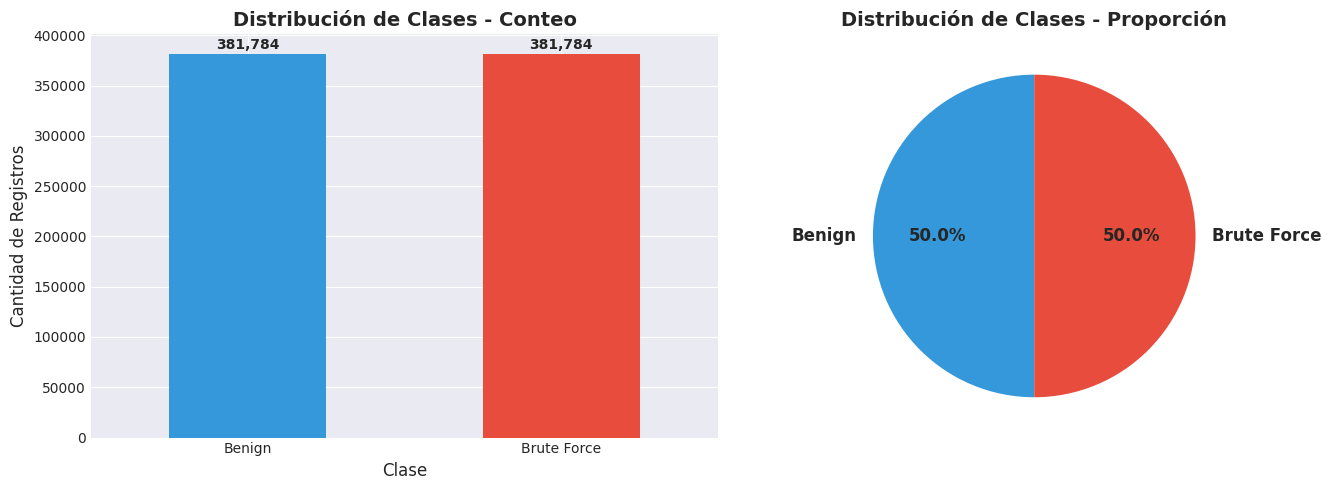


✓ Dataset balanceado: 100.0% ratio


In [7]:
# DISTRIBUCIÓN DE CLASES (LABEL)

print(f"\n{'='*80}")
print("DISTRIBUCIÓN DE CLASES")
print(f"{'='*80}")

# Conteo
label_counts = df['Label'].value_counts()
print(f"\nConteo absoluto:")
print(label_counts)

# Porcentaje
label_percentages = df['Label'].value_counts(normalize=True) * 100
print(f"\nPorcentajes:")
for label, pct in label_percentages.items():
    print(f"{label}: {pct:.2f}%")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
label_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Distribución de Clases - Conteo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Clase', fontsize=12)
axes[0].set_ylabel('Cantidad de Registros', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
for i, v in enumerate(label_counts):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontweight='bold')

# Gráfico de pastel
colors = ['#3498db', '#e74c3c']
axes[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Distribución de Clases - Proporción', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ Dataset balanceado: {label_counts.min() / label_counts.max() * 100:.1f}% ratio")

---

## 📈 Análisis de Features Numéricas

In [8]:
# SELECCIÓN DE FEATURES NUMÉRICAS

# Obtener todas las columnas numéricas (excepto Label)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n{'='*80}")
print(f"FEATURES NUMÉRICAS: {len(numeric_features)}")
print(f"{'='*80}")
print(f"\nLista de features:")
for i, feat in enumerate(numeric_features, 1):
    print(f"{i:2d}. {feat}")


FEATURES NUMÉRICAS: 60

Lista de features:
 1. Dst Port
 2. Protocol
 3. Timestamp
 4. Flow Duration
 5. Tot Fwd Pkts
 6. Tot Bwd Pkts
 7. TotLen Fwd Pkts
 8. Fwd Pkt Len Max
 9. Fwd Pkt Len Min
10. Fwd Pkt Len Mean
11. Fwd Pkt Len Std
12. Bwd Pkt Len Max
13. Bwd Pkt Len Min
14. Bwd Pkt Len Mean
15. Bwd Pkt Len Std
16. Flow Byts/s
17. Flow Pkts/s
18. Flow IAT Mean
19. Flow IAT Std
20. Flow IAT Max
21. Fwd IAT Std
22. Bwd IAT Tot
23. Bwd IAT Mean
24. Bwd IAT Std
25. Bwd IAT Max
26. Bwd IAT Min
27. Fwd PSH Flags
28. Bwd PSH Flags
29. Fwd URG Flags
30. Bwd URG Flags
31. Fwd Pkts/s
32. Bwd Pkts/s
33. Pkt Len Min
34. Pkt Len Max
35. Pkt Len Mean
36. Pkt Len Std
37. Pkt Len Var
38. FIN Flag Cnt
39. RST Flag Cnt
40. PSH Flag Cnt
41. ACK Flag Cnt
42. URG Flag Cnt
43. CWE Flag Count
44. Down/Up Ratio
45. Fwd Byts/b Avg
46. Fwd Pkts/b Avg
47. Fwd Blk Rate Avg
48. Bwd Byts/b Avg
49. Bwd Pkts/b Avg
50. Bwd Blk Rate Avg
51. Init Fwd Win Byts
52. Init Bwd Win Byts
53. Fwd Act Data Pkts
54. Fwd Seg 


DISTRIBUCIÓN DE FEATURES (TOP 10 CON MÁS VARIANZA)

Top 10 features con mayor varianza:
 1. PSH Flag Cnt                            : 0.245284
 2. ACK Flag Cnt                            : 0.199595
 3. Timestamp                               : 0.190525
 4. URG Flag Cnt                            : 0.123951
 5. Init Bwd Win Byts                       : 0.065895
 6. Init Fwd Win Byts                       : 0.054010
 7. Protocol                                : 0.053889
 8. Fwd Seg Size Min                        : 0.053730
 9. RST Flag Cnt                            : 0.050088
10. Flow Duration                           : 0.048794


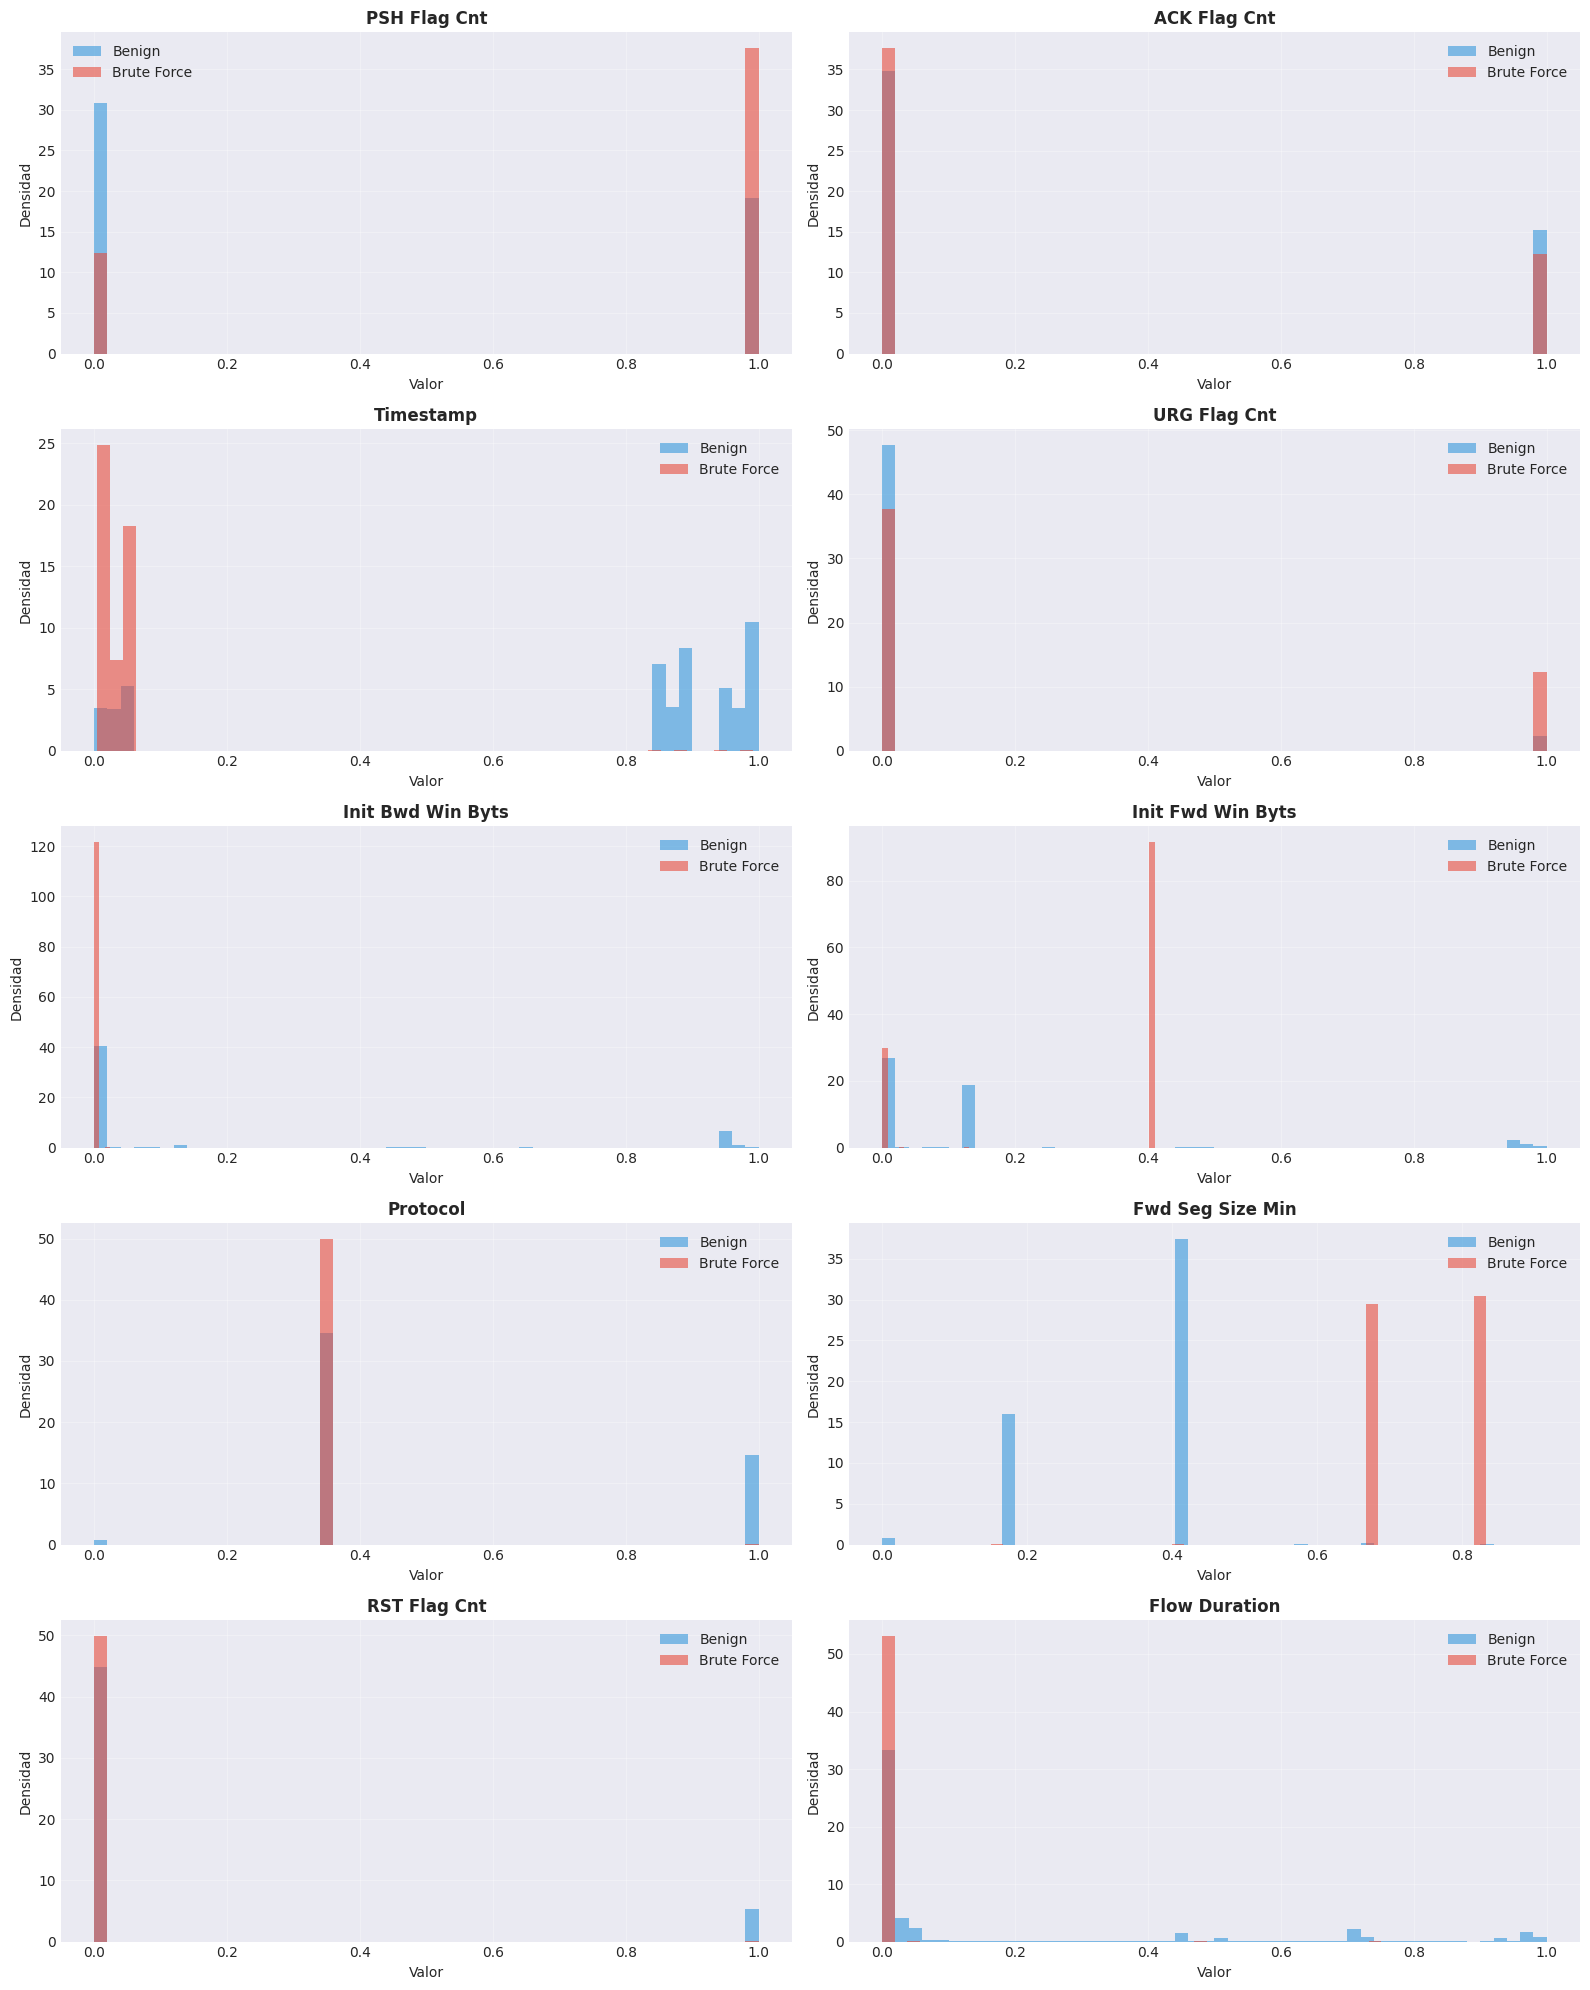

In [9]:
# ANÁLISIS DE DISTRIBUCIÓN DE FEATURES

print(f"\n{'='*80}")
print("DISTRIBUCIÓN DE FEATURES (TOP 10 CON MÁS VARIANZA)")
print(f"{'='*80}")

# Calcular varianza de cada feature
variances = df[numeric_features].var().sort_values(ascending=False)
top_10_variance = variances.head(10)

print(f"\nTop 10 features con mayor varianza:")
for i, (feat, var) in enumerate(top_10_variance.items(), 1):
    print(f"{i:2d}. {feat:40s}: {var:.6f}")

# Visualizar distribuciones de las top 10 features
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

# Separar por clase
df_benign = df[df['Label'] == 'Benign']
df_attack = df[df['Label'] == 'Brute Force']

for i, feat in enumerate(top_10_variance.index):
    benign_data = df_benign[feat]
    attack_data = df_attack[feat]

    axes[i].hist(benign_data, bins=50, alpha=0.6, label='Benign', color='#3498db', density=True)
    axes[i].hist(attack_data, bins=50, alpha=0.6, label='Brute Force', color='#e74c3c', density=True)
    axes[i].set_title(f'{feat}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Valor', fontsize=10)
    axes[i].set_ylabel('Densidad', fontsize=10)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## ⚔️ Comparación: Brute Force vs Benign

In [10]:
# COMPARACIÓN DE MEDIAS POR CLASE

print(f"\n{'='*80}")
print("COMPARACIÓN DE MEDIAS: BRUTE FORCE VS BENIGN")
print(f"{'='*80}")

# Calcular medias por clase
means_benign = df_benign[numeric_features].mean()
means_attack = df_attack[numeric_features].mean()

# Crear DataFrame comparativo
comparison = pd.DataFrame({
    'Benign_Mean': means_benign,
    'BruteForce_Mean': means_attack,
    'Difference': means_attack - means_benign,
    'Ratio': (means_attack / (means_benign + 1e-10))
})

comparison['Abs_Difference'] = comparison['Difference'].abs()
comparison_sorted = comparison.sort_values('Abs_Difference', ascending=False)

print(f"\nTop 15 features con mayor diferencia entre clases:")
print(comparison_sorted[['Benign_Mean', 'BruteForce_Mean', 'Difference', 'Ratio']].head(15))


COMPARACIÓN DE MEDIAS: BRUTE FORCE VS BENIGN

Top 15 features con mayor diferencia entre clases:
                   Benign_Mean  BruteForce_Mean  Difference    Ratio
Timestamp               0.7088           0.0289     -0.6799   0.0408
Fwd Seg Size Min        0.3381           0.7504      0.4124   2.2197
PSH Flag Cnt            0.3841           0.7533      0.3692   1.9612
URG Flag Cnt            0.0444           0.2455      0.2011   5.5285
Init Fwd Win Byts       0.1214           0.3096      0.1882   2.5506
Protocol                0.5370           0.3531     -0.1838   0.6577
Bwd Pkts/s              0.0015           0.1700      0.1685 112.7728
Flow Pkts/s             0.0069           0.1700      0.1632  24.6921
Init Bwd Win Byts       0.1563           0.0018     -0.1545   0.0112
Flow Duration           0.1445           0.0014     -0.1432   0.0095
Dst Port                0.1310           0.0003     -0.1307   0.0025
RST Flag Cnt            0.1048           0.0010     -0.1038   0.0095
Flow 

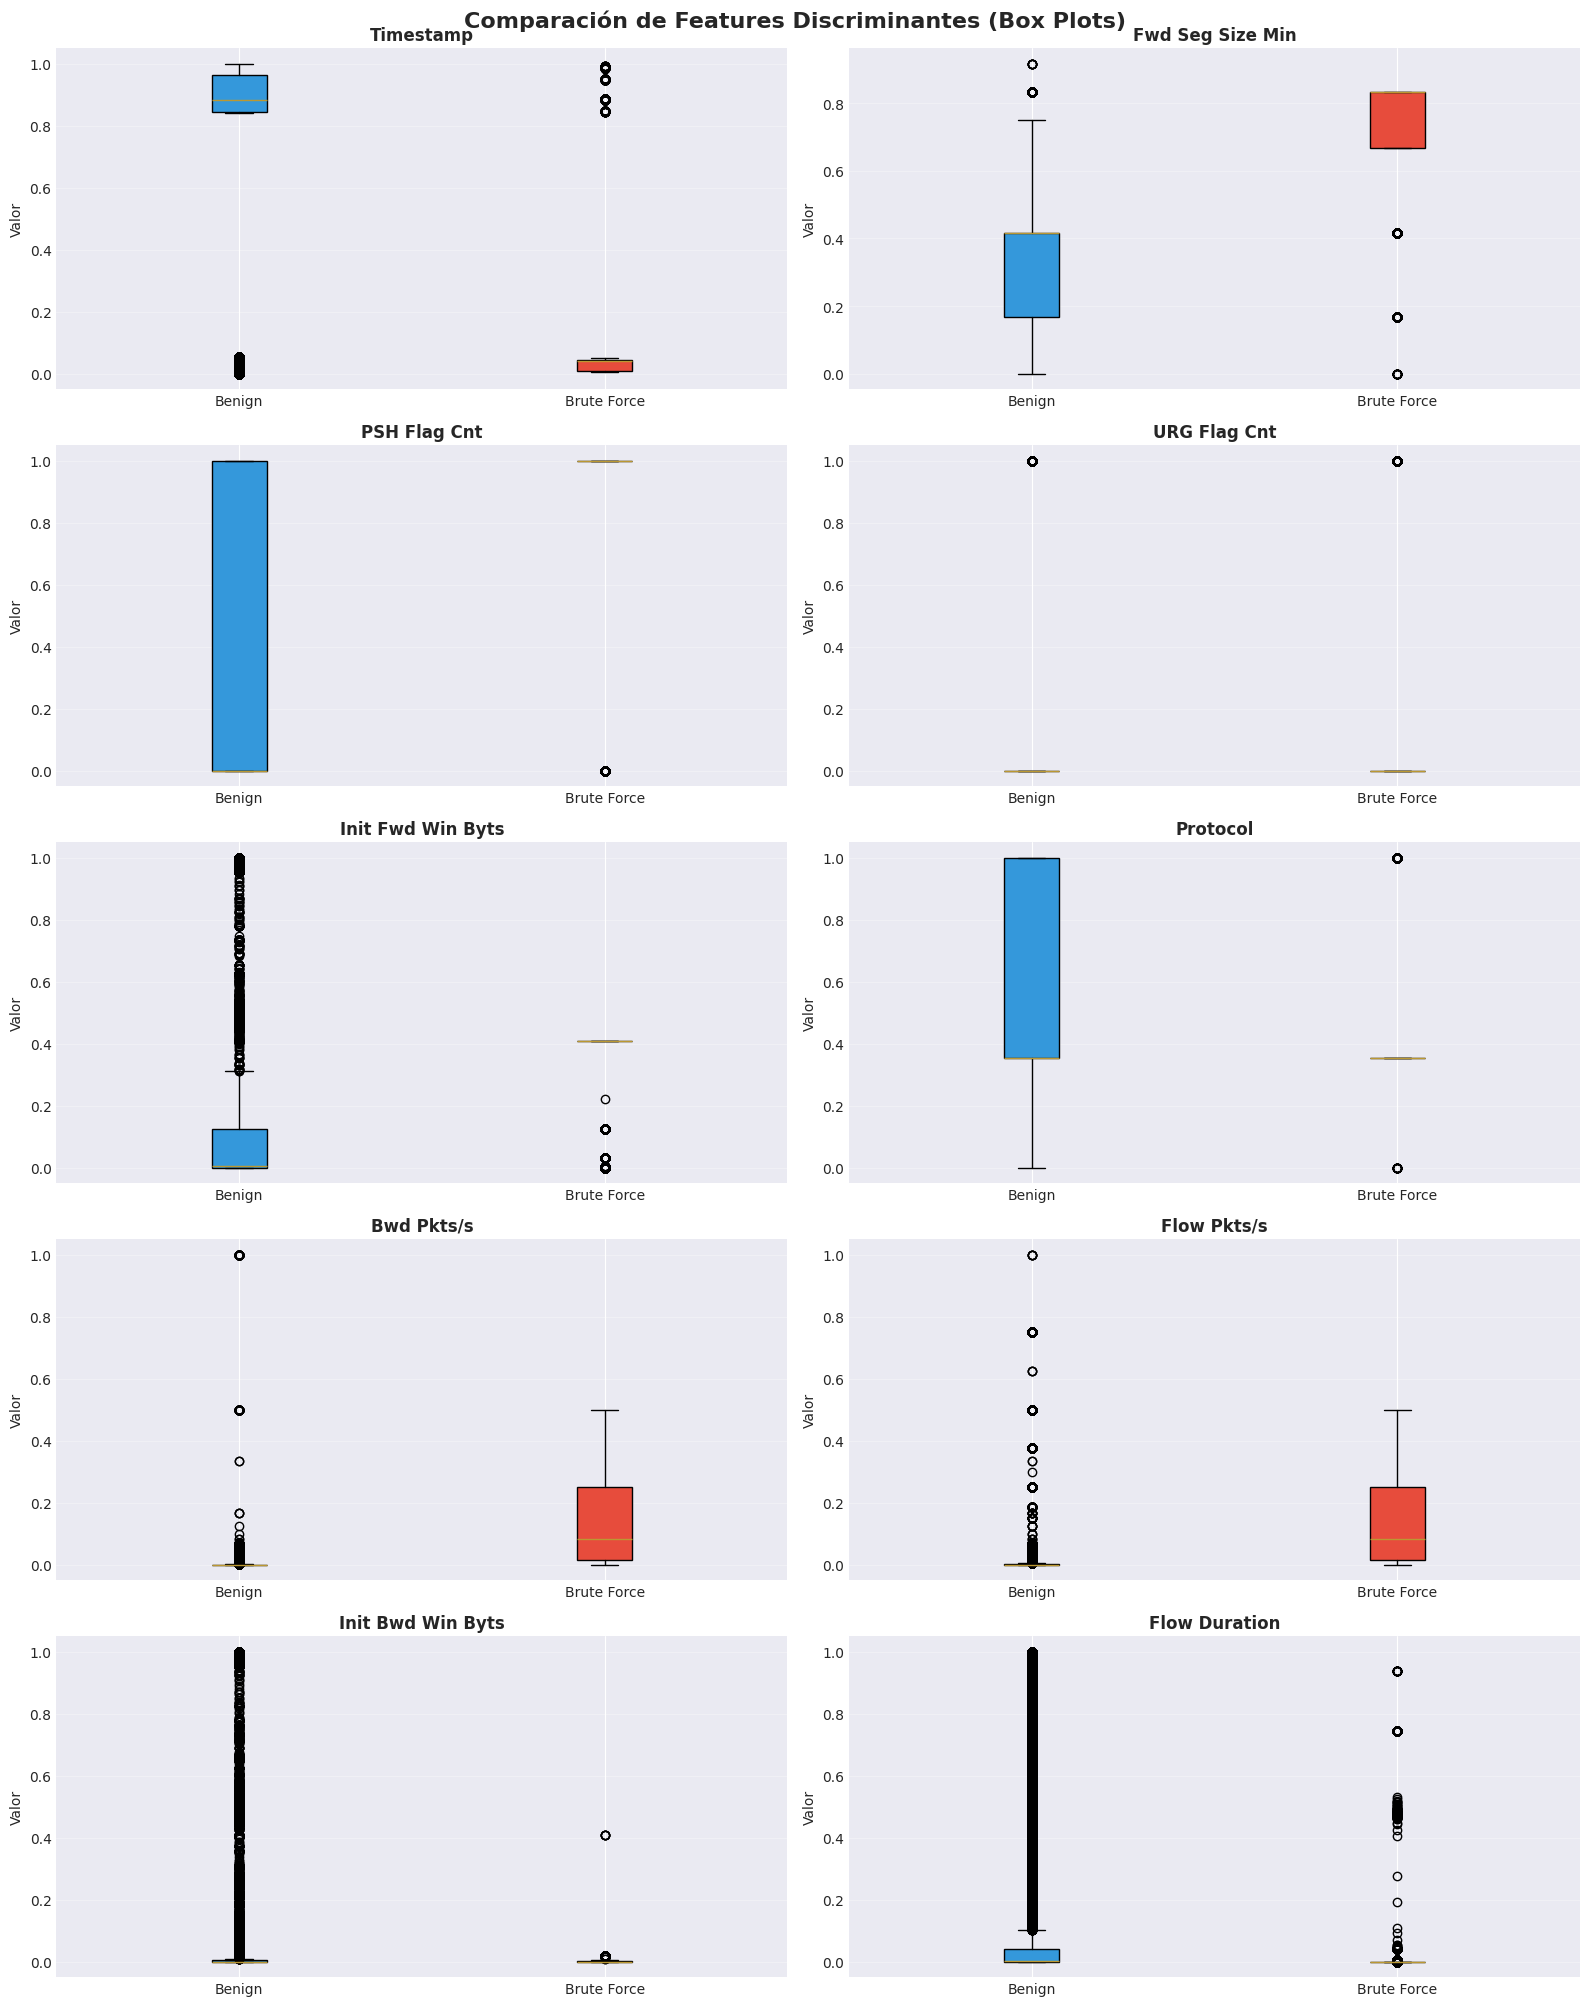

In [11]:
# VISUALIZACIÓN DE TOP FEATURES DISCRIMINANTES

# Top 10 features con mayor diferencia
top_discriminant = comparison_sorted.head(10).index

fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for i, feat in enumerate(top_discriminant):
    benign_vals = df_benign[feat]
    attack_vals = df_attack[feat]

    # Box plot
    data_to_plot = [benign_vals, attack_vals]
    bp = axes[i].boxplot(data_to_plot, labels=['Benign', 'Brute Force'], patch_artist=True)

    # Colorear
    bp['boxes'][0].set_facecolor('#3498db')
    bp['boxes'][1].set_facecolor('#e74c3c')

    axes[i].set_title(f'{feat}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Valor', fontsize=10)
    axes[i].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.suptitle('Comparación de Features Discriminantes (Box Plots)',
             fontsize=16, fontweight='bold', y=1.001)
plt.show()

---

## 🔗 Análisis de Correlaciones


ANÁLISIS DE CORRELACIONES

Matriz de correlación calculada para top 20 features discriminantes


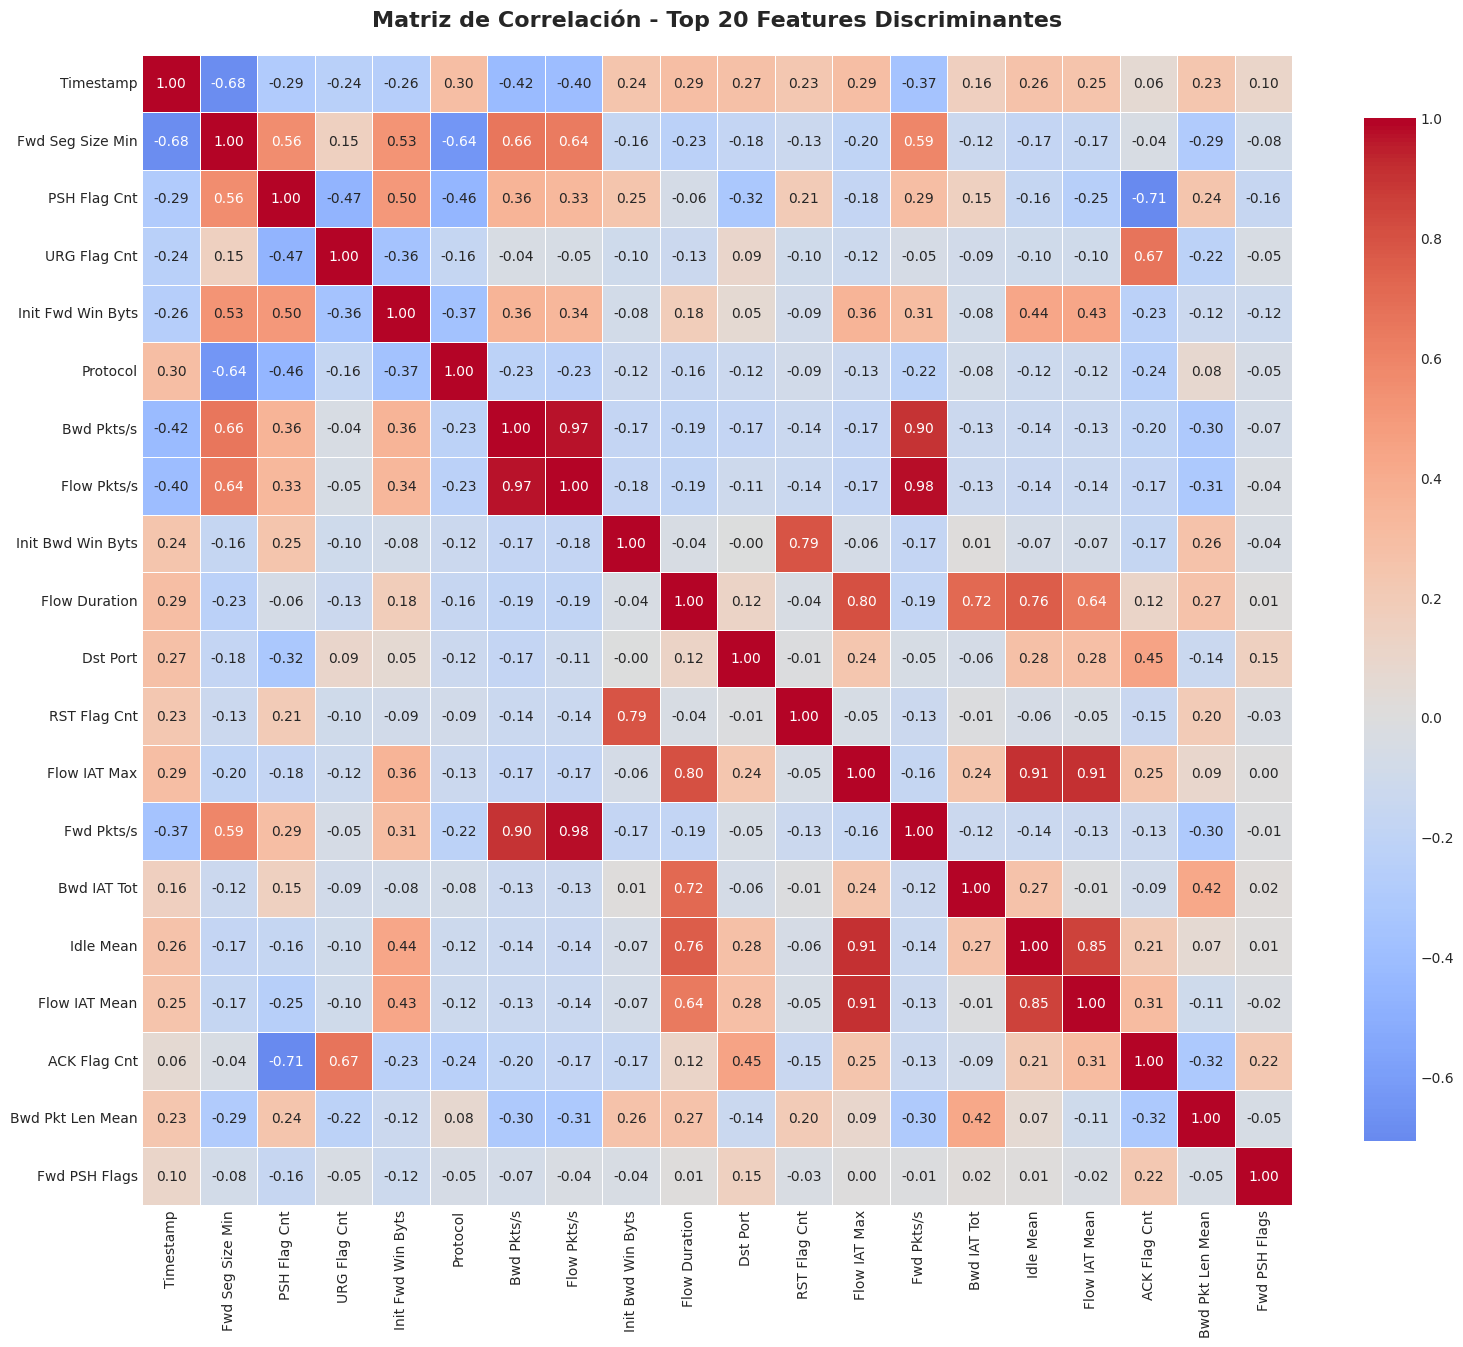


Pares de features con correlación alta (|r| > 0.7):
  Flow Pkts/s                    <-> Fwd Pkts/s                    : 0.977
  Bwd Pkts/s                     <-> Flow Pkts/s                   : 0.973
  Flow IAT Max                   <-> Idle Mean                     : 0.913
  Flow IAT Max                   <-> Flow IAT Mean                 : 0.910
  Bwd Pkts/s                     <-> Fwd Pkts/s                    : 0.902
  Idle Mean                      <-> Flow IAT Mean                 : 0.849
  Flow Duration                  <-> Flow IAT Max                  : 0.804
  Init Bwd Win Byts              <-> RST Flag Cnt                  : 0.790
  Flow Duration                  <-> Idle Mean                     : 0.759
  Flow Duration                  <-> Bwd IAT Tot                   : 0.718
  PSH Flag Cnt                   <-> ACK Flag Cnt                  : -0.708


In [12]:
# MATRIZ DE CORRELACIÓN

print(f"\n{'='*80}")
print("ANÁLISIS DE CORRELACIONES")
print(f"{'='*80}")

# Calcular matriz de correlación (solo top 20 features para visualizar)
top_20_features = comparison_sorted.head(20).index
corr_matrix = df[top_20_features].corr()

print(f"\nMatriz de correlación calculada para top 20 features discriminantes")

# Heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Top 20 Features Discriminantes',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Encontrar pares altamente correlacionados (|r| > 0.7)
print(f"\nPares de features con correlación alta (|r| > 0.7):")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr:
    for feat1, feat2, corr in sorted(high_corr, key=lambda x: abs(x[2]), reverse=True):
        print(f"  {feat1:30s} <-> {feat2:30s}: {corr:.3f}")
else:
    print("  No se encontraron pares con correlación > 0.7")

---

## ⏰ Análisis Temporal


ANÁLISIS TEMPORAL

Periodo del dataset:
  Inicio: 1970-01-01 00:00:00
  Fin: 1970-01-01 00:00:01
  Duración: 0 días


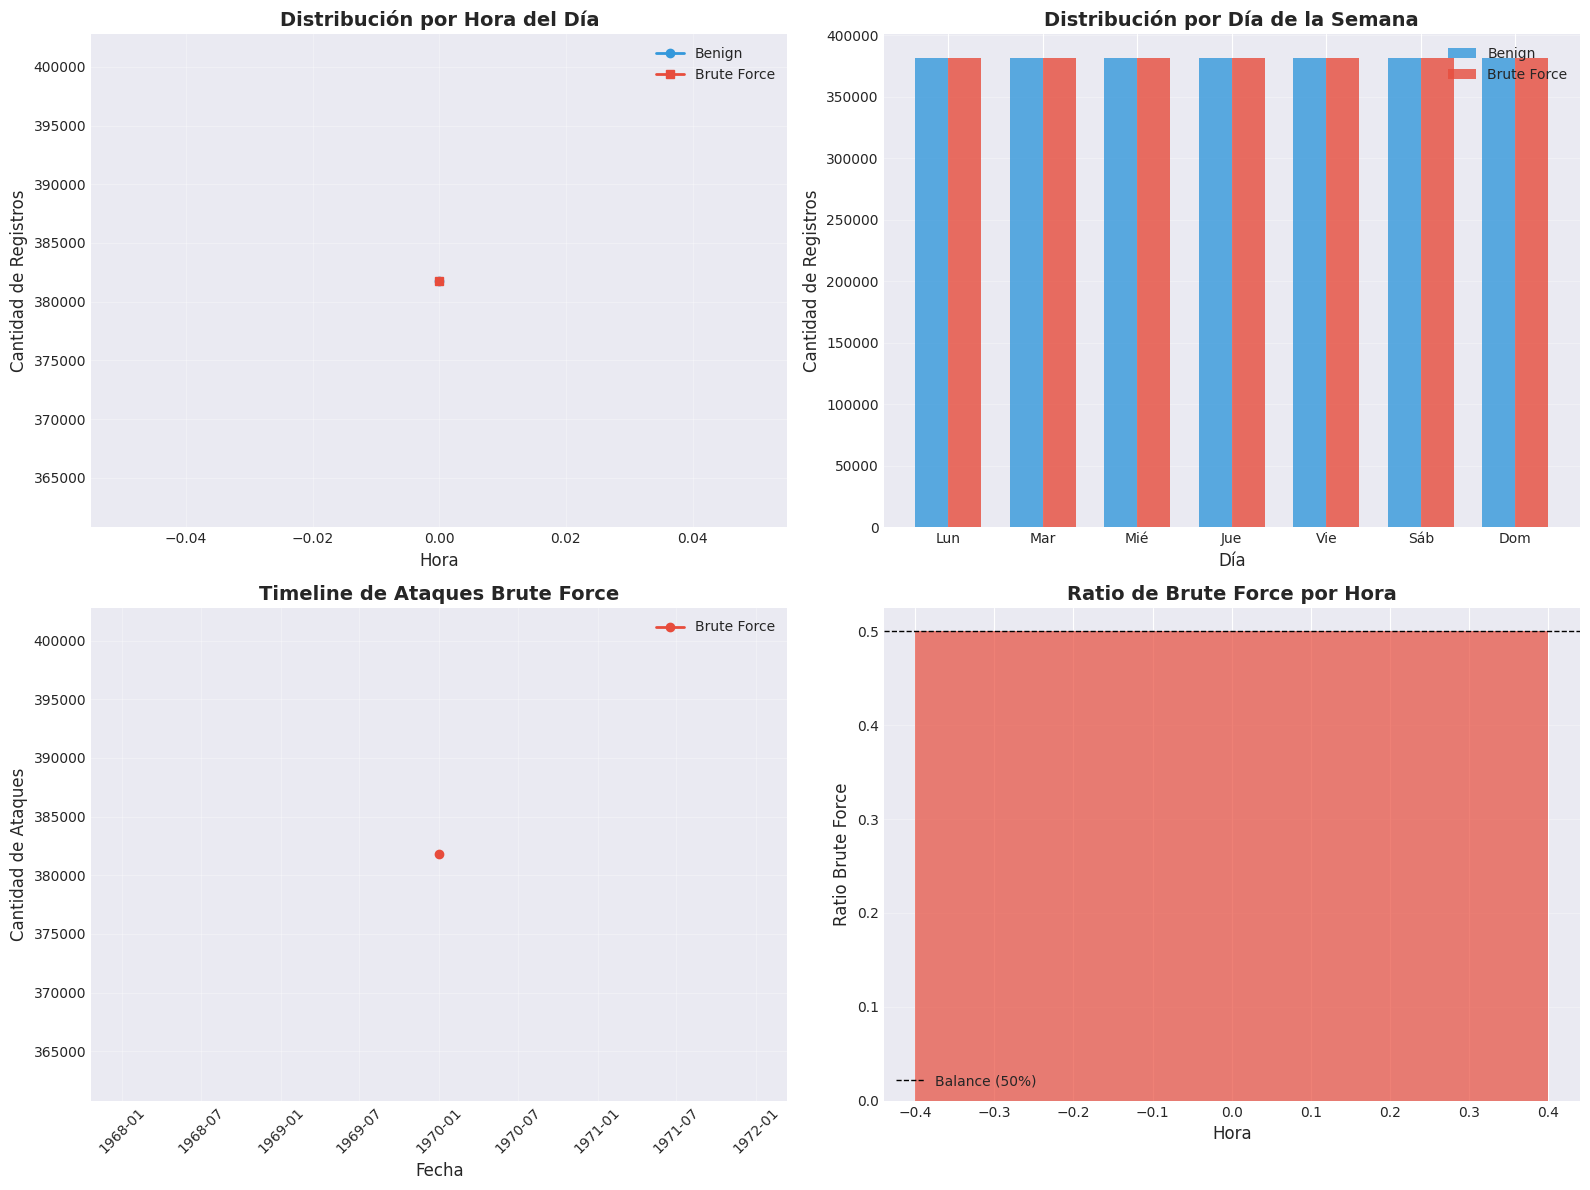

In [13]:
# ANÁLISIS TEMPORAL (TIMESTAMP)

if 'Timestamp' in df.columns:
    print(f"\n{'='*80}")
    print("ANÁLISIS TEMPORAL")
    print(f"{'='*80}")

    # Convertir epoch a datetime para análisis
    df['DateTime'] = pd.to_datetime(df['Timestamp'], unit='s')

    # Extraer componentes temporales
    df['Hour'] = df['DateTime'].dt.hour
    df['DayOfWeek'] = df['DateTime'].dt.dayofweek
    df['Date'] = df['DateTime'].dt.date

    print(f"\nPeriodo del dataset:")
    print(f"  Inicio: {df['DateTime'].min()}")
    print(f"  Fin: {df['DateTime'].max()}")
    print(f"  Duración: {(df['DateTime'].max() - df['DateTime'].min()).days} días")

    # Distribución por hora
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Por hora del día
    hour_counts_benign = df[df['Label'] == 'Benign']['Hour'].value_counts().sort_index()
    hour_counts_attack = df[df['Label'] == 'Brute Force']['Hour'].value_counts().sort_index()

    axes[0, 0].plot(hour_counts_benign.index, hour_counts_benign.values,
                    marker='o', label='Benign', color='#3498db', linewidth=2)
    axes[0, 0].plot(hour_counts_attack.index, hour_counts_attack.values,
                    marker='s', label='Brute Force', color='#e74c3c', linewidth=2)
    axes[0, 0].set_title('Distribución por Hora del Día', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Hora', fontsize=12)
    axes[0, 0].set_ylabel('Cantidad de Registros', fontsize=12)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Por día de la semana
    day_names = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
    dow_counts_benign = df[df['Label'] == 'Benign']['DayOfWeek'].value_counts().sort_index()
    dow_counts_attack = df[df['Label'] == 'Brute Force']['DayOfWeek'].value_counts().sort_index()

    x = np.arange(len(day_names))
    width = 0.35
    axes[0, 1].bar(x - width/2, dow_counts_benign.values, width,
                   label='Benign', color='#3498db', alpha=0.8)
    axes[0, 1].bar(x + width/2, dow_counts_attack.values, width,
                   label='Brute Force', color='#e74c3c', alpha=0.8)
    axes[0, 1].set_title('Distribución por Día de la Semana', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Día', fontsize=12)
    axes[0, 1].set_ylabel('Cantidad de Registros', fontsize=12)
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(day_names)
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3, axis='y')

    # Timeline de ataques
    attack_timeline = df[df['Label'] == 'Brute Force'].groupby('Date').size()

    axes[1, 0].plot(attack_timeline.index, attack_timeline.values,
                    marker='o', label='Brute Force', color='#e74c3c', linewidth=2)
    axes[1, 0].set_title('Timeline de Ataques Brute Force', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Fecha', fontsize=12)
    axes[1, 0].set_ylabel('Cantidad de Ataques', fontsize=12)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Ratio Brute Force por hora
    total_by_hour = df.groupby('Hour')['Label'].value_counts().unstack(fill_value=0)
    if 'Brute Force' in total_by_hour.columns and 'Benign' in total_by_hour.columns:
        ratio_by_hour = total_by_hour['Brute Force'] / (total_by_hour['Benign'] + total_by_hour['Brute Force'])
        axes[1, 1].bar(ratio_by_hour.index, ratio_by_hour.values, color='#e74c3c', alpha=0.7)
        axes[1, 1].set_title('Ratio de Brute Force por Hora', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Hora', fontsize=12)
        axes[1, 1].set_ylabel('Ratio Brute Force', fontsize=12)
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        axes[1, 1].axhline(y=0.5, color='black', linestyle='--', linewidth=1, label='Balance (50%)')
        axes[1, 1].legend()

    plt.tight_layout()
    plt.show()
else:
    print("\nTimestamp no encontrado en el dataset")

---

## 🌐 Análisis de Features de Tráfico de Red

In [14]:
# ANÁLISIS DE VELOCIDAD (PACKETS/S, BYTES/S)

print(f"\n{'='*80}")
print("ANÁLISIS DE VELOCIDAD DE TRÁFICO")
print(f"{'='*80}")

# Buscar features de velocidad
speed_features = [col for col in numeric_features if 'Packets/s' in col or 'Bytes/s' in col]

if speed_features:
    print(f"\nFeatures de velocidad encontradas: {len(speed_features)}")
    for feat in speed_features:
        print(f"  - {feat}")

    # Visualizar
    n_speed = len(speed_features)
    if n_speed > 0:
        fig, axes = plt.subplots(1, min(n_speed, 3), figsize=(16, 5))
        if n_speed == 1:
            axes = [axes]

        for i, feat in enumerate(speed_features[:3]):
            benign_data = df_benign[feat]
            attack_data = df_attack[feat]

            axes[i].hist(benign_data, bins=50, alpha=0.6, label='Benign',
                        color='#3498db', density=True)
            axes[i].hist(attack_data, bins=50, alpha=0.6, label='Brute Force',
                        color='#e74c3c', density=True)
            axes[i].set_title(f'{feat}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel('Valor', fontsize=10)
            axes[i].set_ylabel('Densidad', fontsize=10)
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Estadísticas
        print(f"\nEstadísticas de velocidad:")
        for feat in speed_features:
            benign_mean = df_benign[feat].mean()
            attack_mean = df_attack[feat].mean()
            diff_pct = ((attack_mean / (benign_mean + 1e-10)) - 1) * 100
            print(f"\n{feat}:")
            print(f"  Benign: {benign_mean:.6f}")
            print(f"  Brute Force: {attack_mean:.6f}")
            print(f"  Diferencia: {attack_mean - benign_mean:+.6f} ({diff_pct:+.2f}%)")
else:
    print("\nNo se encontraron features de velocidad")


ANÁLISIS DE VELOCIDAD DE TRÁFICO

No se encontraron features de velocidad



ANÁLISIS DE TCP FLAGS

Features de TCP flags encontradas: 10
  - Fwd PSH Flags
  - Bwd PSH Flags
  - Fwd URG Flags
  - Bwd URG Flags
  - FIN Flag Cnt
  - RST Flag Cnt
  - PSH Flag Cnt
  - ACK Flag Cnt
  - URG Flag Cnt
  - CWE Flag Count

Comparación de TCP Flags (Benign vs Brute Force):
Flag                            Benign  Brute Force   Diferencia
-----------------------------------------------------------------
Fwd PSH Flags                 0.037485     0.000003    -0.037482
Bwd PSH Flags                 0.000000     0.000000     0.000000
Fwd URG Flags                 0.000000     0.000000     0.000000
Bwd URG Flags                 0.000000     0.000000     0.000000
FIN Flag Cnt                  0.004919     0.000000    -0.004919
RST Flag Cnt                  0.104771     0.000998    -0.103773
PSH Flag Cnt                  0.384086     0.753264     0.369177
ACK Flag Cnt                  0.304646     0.246333    -0.058313
URG Flag Cnt                  0.044410     0.245521     0.20

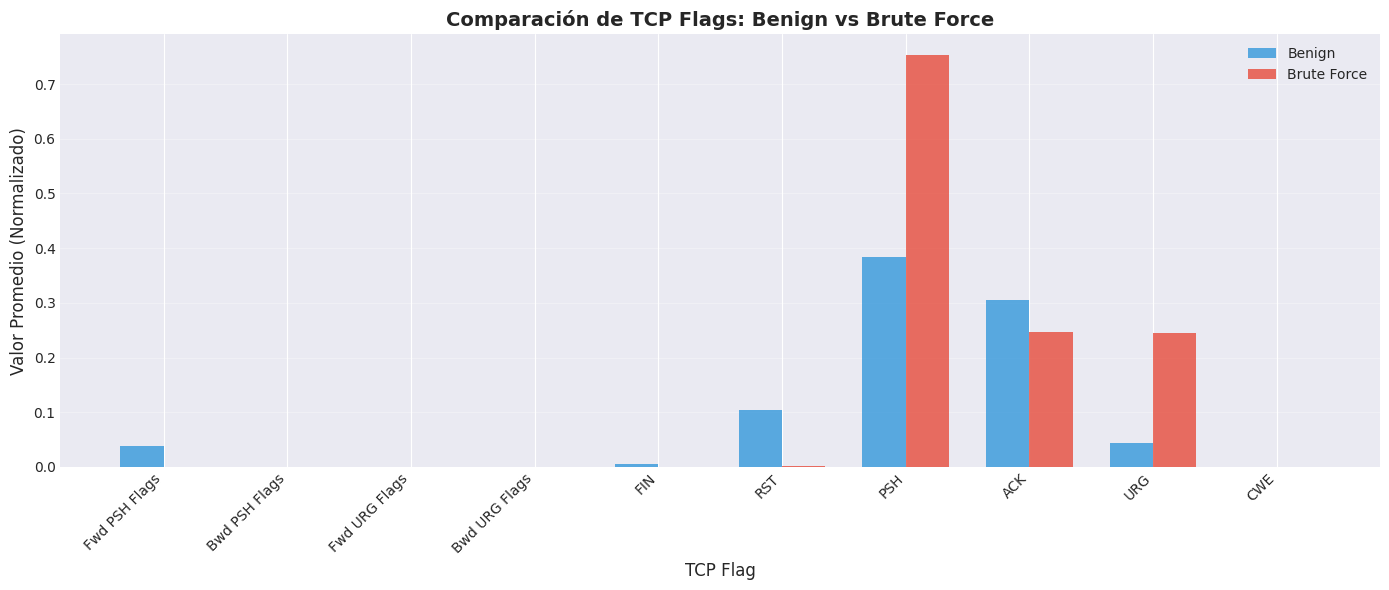

In [15]:
# ANÁLISIS DE TCP FLAGS

print(f"\n{'='*80}")
print("ANÁLISIS DE TCP FLAGS")
print(f"{'='*80}")

# Buscar features de flags TCP
flag_features = [col for col in numeric_features if 'Flag' in col]

if flag_features:
    print(f"\nFeatures de TCP flags encontradas: {len(flag_features)}")
    for feat in flag_features:
        print(f"  - {feat}")

    # Comparar medias
    print(f"\nComparación de TCP Flags (Benign vs Brute Force):")
    print(f"{'Flag':<25} {'Benign':>12} {'Brute Force':>12} {'Diferencia':>12}")
    print("-" * 65)

    for feat in flag_features:
        benign_mean = df_benign[feat].mean()
        attack_mean = df_attack[feat].mean()
        diff = attack_mean - benign_mean
        print(f"{feat:<25} {benign_mean:>12.6f} {attack_mean:>12.6f} {diff:>12.6f}")

    # Visualizar
    if len(flag_features) > 0:
        fig, ax = plt.subplots(figsize=(14, 6))

        x = np.arange(len(flag_features))
        width = 0.35

        benign_means = [df_benign[feat].mean() for feat in flag_features]
        attack_means = [df_attack[feat].mean() for feat in flag_features]

        ax.bar(x - width/2, benign_means, width, label='Benign',
               color='#3498db', alpha=0.8)
        ax.bar(x + width/2, attack_means, width, label='Brute Force',
               color='#e74c3c', alpha=0.8)

        ax.set_title('Comparación de TCP Flags: Benign vs Brute Force',
                    fontsize=14, fontweight='bold')
        ax.set_xlabel('TCP Flag', fontsize=12)
        ax.set_ylabel('Valor Promedio (Normalizado)', fontsize=12)
        ax.set_xticks(x)
        ax.set_xticklabels([f.replace(' Flag Cnt', '').replace(' Flag Count', '') for f in flag_features], rotation=45, ha='right')
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        plt.show()
else:
    print("\nNo se encontraron features de TCP flags")


ANÁLISIS DE INTER-ARRIVAL TIME (IAT)

Features de IAT encontradas: 9
  - Flow IAT Mean
  - Flow IAT Std
  - Flow IAT Max
  - Fwd IAT Std
  - Bwd IAT Tot
  - Bwd IAT Mean
  - Bwd IAT Std
  - Bwd IAT Max
  - Bwd IAT Min


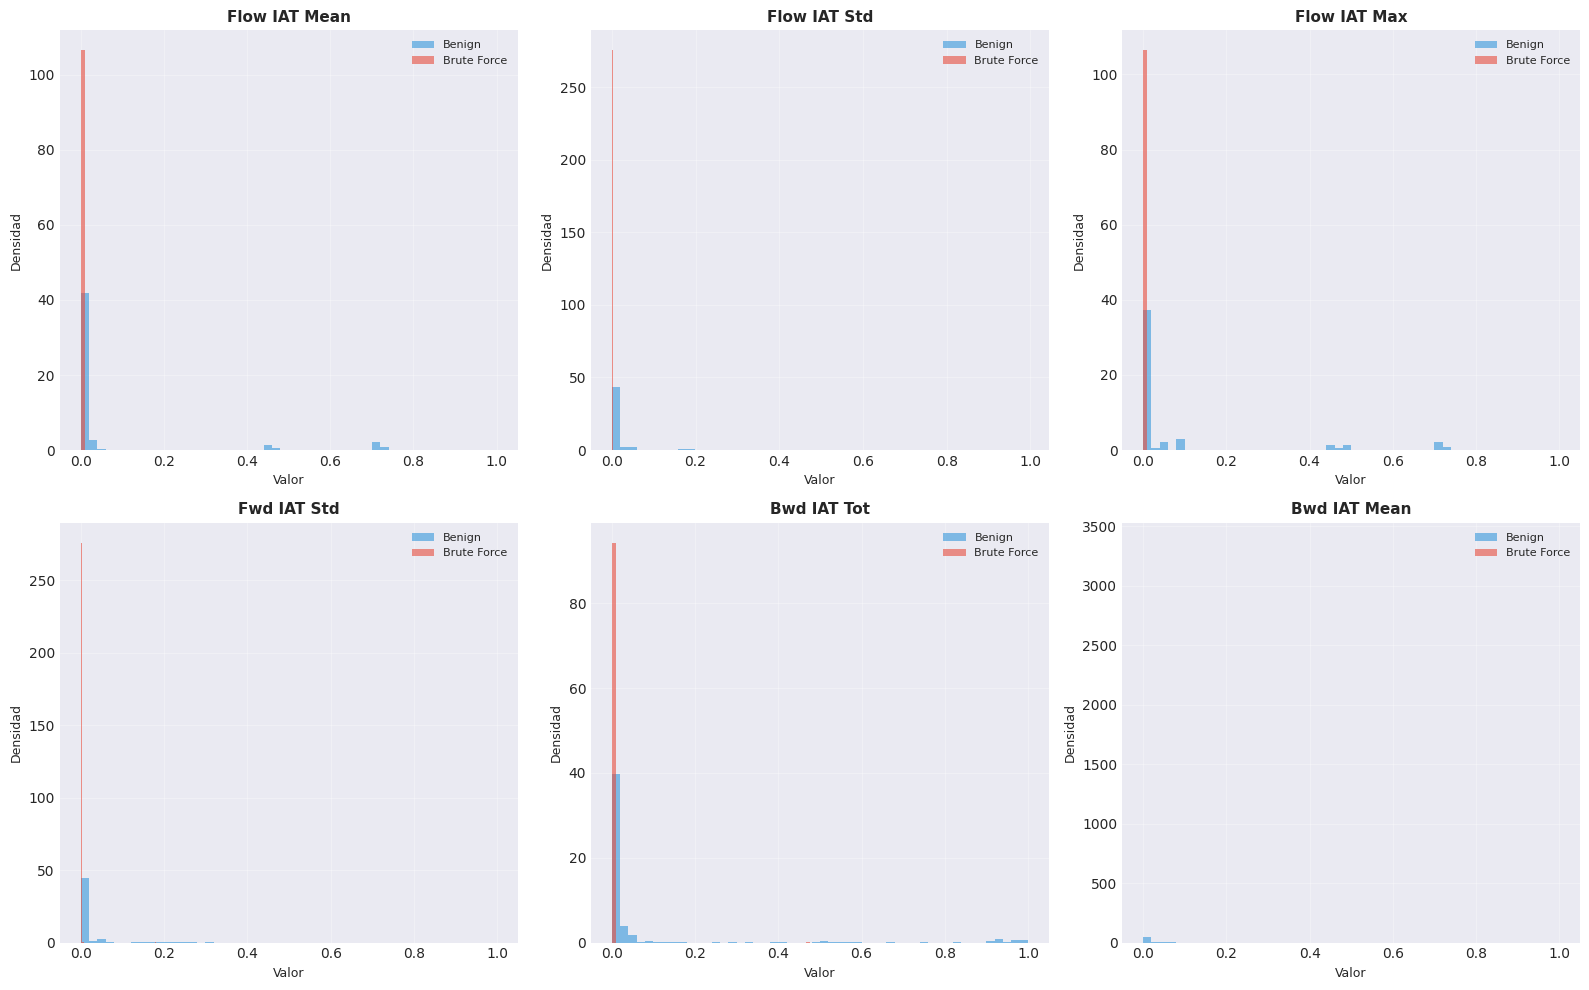


Estadísticas de IAT (Benign vs Brute Force):

Flow IAT Mean:
  Benign - Mean: 0.063701, Std: 0.186266
  Brute Force - Mean: 0.000098, Std: 0.004438

Flow IAT Std:
  Benign - Mean: 0.011628, Std: 0.041918
  Brute Force - Mean: 0.000133, Std: 0.003376

Flow IAT Max:
  Benign - Mean: 0.087099, Std: 0.201874
  Brute Force - Mean: 0.000376, Std: 0.007387

Fwd IAT Std:
  Benign - Mean: 0.012520, Std: 0.047019
  Brute Force - Mean: 0.000154, Std: 0.003369

Bwd IAT Tot:
  Benign - Mean: 0.070457, Std: 0.224761
  Brute Force - Mean: 0.001054, Std: 0.011892


In [16]:
# ANÁLISIS DE IAT (INTER-ARRIVAL TIME)

print(f"\n{'='*80}")
print("ANÁLISIS DE INTER-ARRIVAL TIME (IAT)")
print(f"{'='*80}")

# Buscar features de IAT
iat_features = [col for col in numeric_features if 'IAT' in col]

if iat_features:
    print(f"\nFeatures de IAT encontradas: {len(iat_features)}")
    for feat in iat_features:
        print(f"  - {feat}")

    # Visualizar top IAT features
    n_iat = min(len(iat_features), 6)
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.ravel()

    for i, feat in enumerate(iat_features[:n_iat]):
        benign_data = df_benign[feat]
        attack_data = df_attack[feat]

        axes[i].hist(benign_data, bins=50, alpha=0.6, label='Benign',
                    color='#3498db', density=True)
        axes[i].hist(attack_data, bins=50, alpha=0.6, label='Brute Force',
                    color='#e74c3c', density=True)
        axes[i].set_title(f'{feat}', fontsize=11, fontweight='bold')
        axes[i].set_xlabel('Valor', fontsize=9)
        axes[i].set_ylabel('Densidad', fontsize=9)
        axes[i].legend(fontsize=8)
        axes[i].grid(True, alpha=0.3)

    # Ocultar ejes sobrantes
    for i in range(n_iat, 6):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # Estadísticas de IAT
    print(f"\nEstadísticas de IAT (Benign vs Brute Force):")
    for feat in iat_features[:5]:
        benign_mean = df_benign[feat].mean()
        attack_mean = df_attack[feat].mean()
        benign_std = df_benign[feat].std()
        attack_std = df_attack[feat].std()

        print(f"\n{feat}:")
        print(f"  Benign - Mean: {benign_mean:.6f}, Std: {benign_std:.6f}")
        print(f"  Brute Force - Mean: {attack_mean:.6f}, Std: {attack_std:.6f}")
else:
    print("\nNo se encontraron features de IAT")


ANÁLISIS DE PACKET LENGTH

Features de Packet Length encontradas: 13
  - Fwd Pkt Len Max
  - Fwd Pkt Len Min
  - Fwd Pkt Len Mean
  - Fwd Pkt Len Std
  - Bwd Pkt Len Max
  - Bwd Pkt Len Min
  - Bwd Pkt Len Mean
  - Bwd Pkt Len Std
  - Pkt Len Min
  - Pkt Len Max
  - Pkt Len Mean
  - Pkt Len Std
  - Pkt Len Var


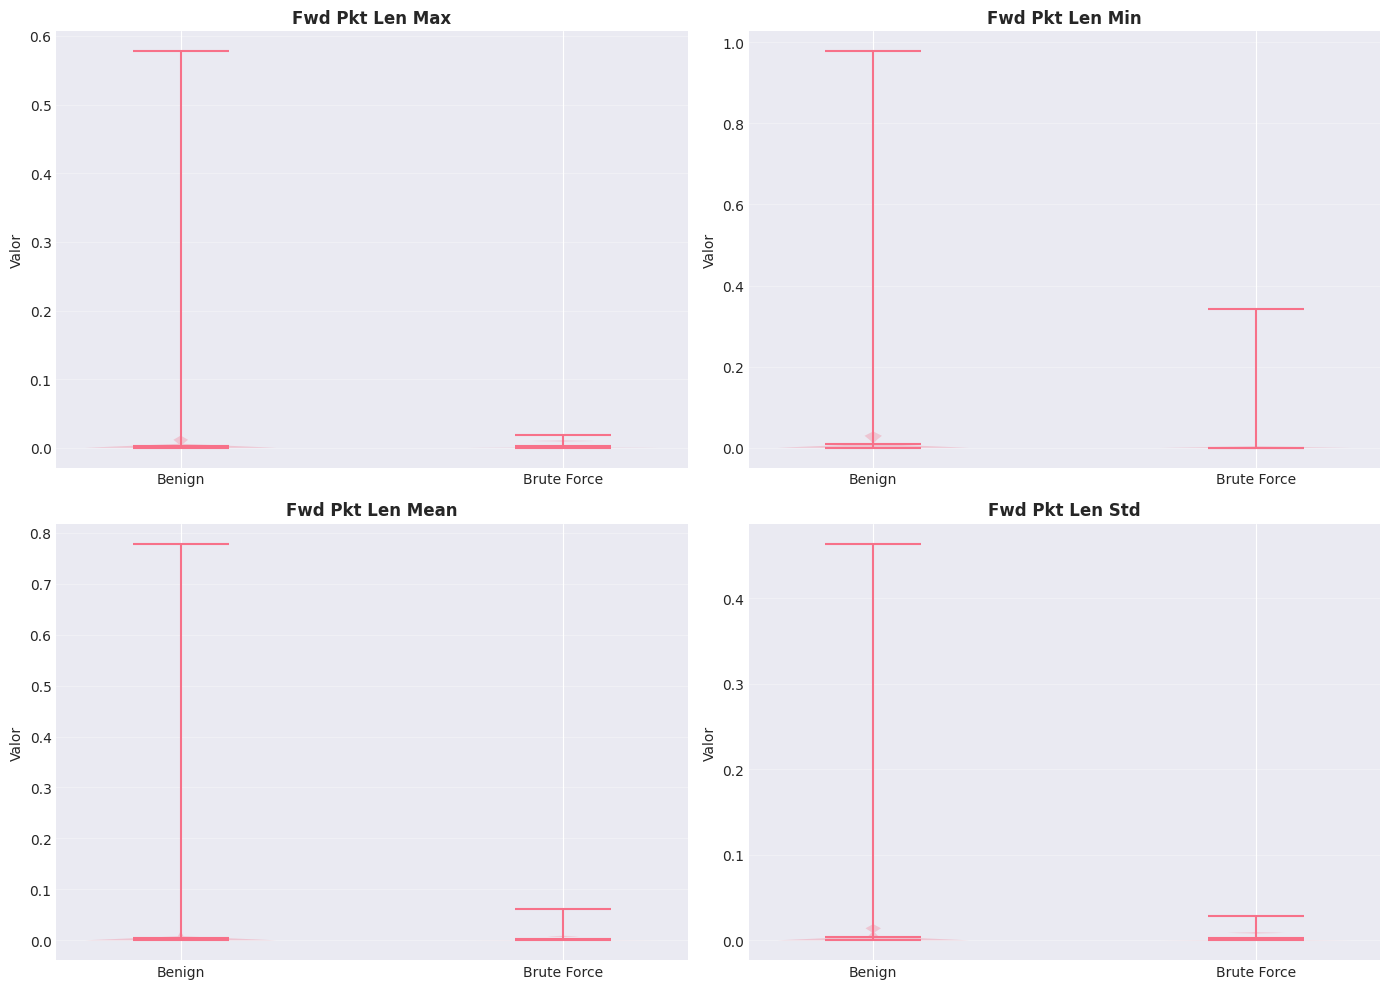

In [17]:
# ANÁLISIS DE PACKET LENGTH

print(f"\n{'='*80}")
print("ANÁLISIS DE PACKET LENGTH")
print(f"{'='*80}")

# Buscar features de packet length
pkt_len_features = [col for col in numeric_features if 'Pkt Len' in col or 'Packet Length' in col]

if pkt_len_features:
    print(f"\nFeatures de Packet Length encontradas: {len(pkt_len_features)}")
    for feat in pkt_len_features:
        print(f"  - {feat}")

    # Visualizar
    if len(pkt_len_features) > 0:
        n_pkt = min(len(pkt_len_features), 4)
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.ravel()

        for i, feat in enumerate(pkt_len_features[:n_pkt]):
            axes[i].violinplot([df_benign[feat], df_attack[feat]],
                              positions=[1, 2], showmeans=True)
            axes[i].set_title(f'{feat}', fontsize=12, fontweight='bold')
            axes[i].set_xticks([1, 2])
            axes[i].set_xticklabels(['Benign', 'Brute Force'])
            axes[i].set_ylabel('Valor', fontsize=10)
            axes[i].grid(True, alpha=0.3, axis='y')

        # Ocultar ejes sobrantes
        for i in range(n_pkt, 4):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()
else:
    print("\nNo se encontraron features de Packet Length")

---

## 📝 Conclusiones del EDA

### Hallazgos Principales:

**1. Balance del Dataset**
- Dataset perfectamente balanceado: 50% Brute Force / 50% Benign
- Total: ~763,000 registros
- Features: 60 (después de eliminar correlaciones >0.99)

**2. Calidad de Datos**
- ✓ No hay valores nulos
- ✓ No hay duplicados
- ✓ Valores normalizados entre 0 y 1 (MinMaxScaler)

**3. Features Discriminantes**
- Las features con mayor diferencia entre clases son las más importantes para el modelo
- TCP Flags, velocidad de paquetes (Packets/s, Bytes/s) y IAT son buenos discriminadores
- Packet Length también muestra patrones distintivos

**4. Patrones Temporales**
- Dataset cubre múltiples días de tráfico de red
- Posibles patrones horarios dependiendo del tipo de ataque (FTP, SSH, Web, XSS)
- Importante para validación temporal del modelo

**5. Características del Tráfico**
- Brute Force típicamente muestra patrones repetitivos en velocidad y flags TCP
- IAT (Inter-Arrival Time) puede ser menor en ataques (conexiones más rápidas)
- Packet length varía según el tipo de Brute Force

### Próximos Pasos:

**1. Feature Engineering (Opcional)**
- Crear ratios entre features relacionadas (ej: Fwd/Bwd packets ratio)
- Agregar features de interacción (ej: TCP flag combinations)
- Considerar transformaciones no lineales para features con alta varianza

**2. Modelado**
- **XGBoost** (recomendado para datasets balanceados)
- **Random Forest**
- **Gradient Boosting**
- Métricas esperadas: F1-Score 0.95-0.99

**3. Feature Selection**
- Usar importancia de features del modelo
- Eliminar features redundantes si es necesario
- Optimizar conjunto final de features

**4. Validación y Optimización**
- K-Fold Cross-Validation (k=5)
- Hyperparameter tuning (GridSearchCV o RandomizedSearchCV)
- Split temporal si es posible (train: primeros días, test: últimos días)

---

**Dataset listo para modelado** ✓